In [1]:
#Importing all libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso,LassoCV ,Ridge
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



Reading Data Set And Data Cleaning

In [2]:
#Reading the data file and displaying info
houses = pd.read_csv("California_Houses.csv")
#houses
houses.info() #to check that all info are non-null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

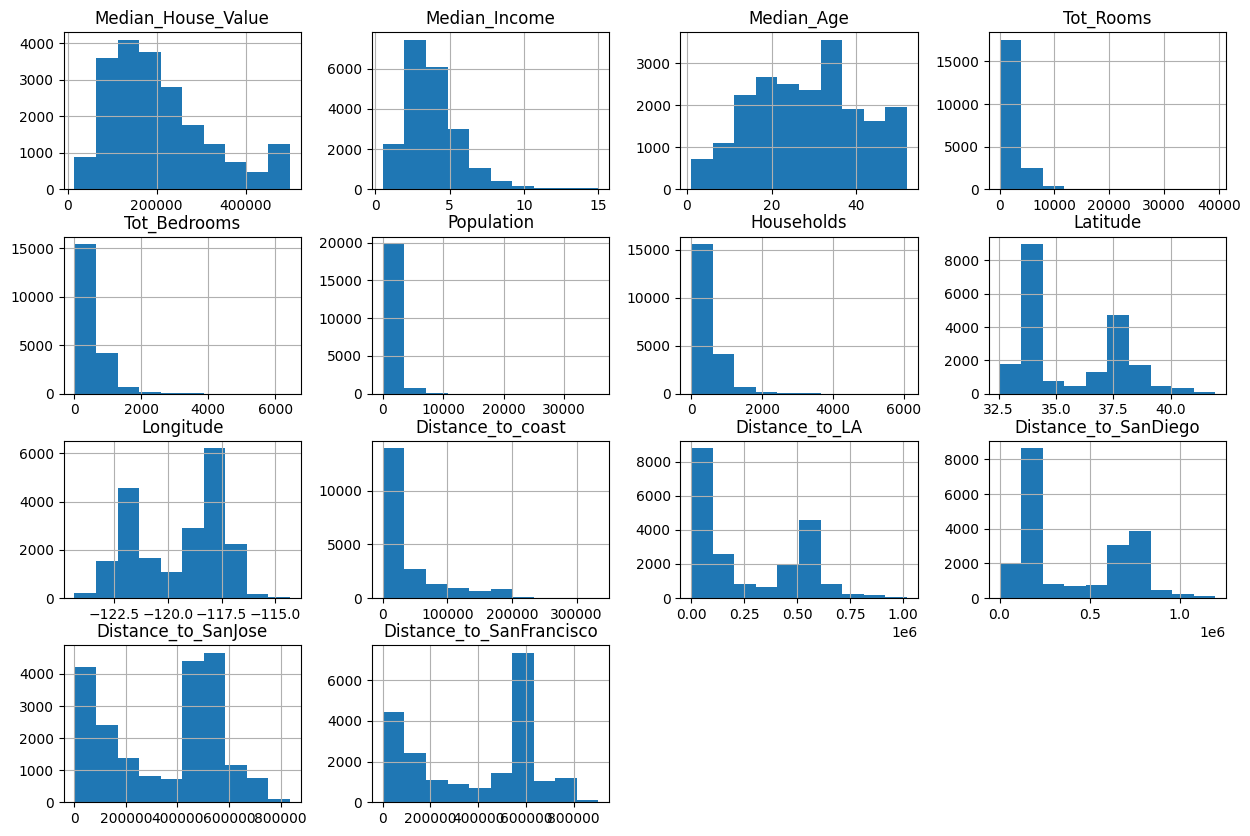

In [3]:
#Histogram of all data
houses.hist(figsize=(15,10))

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

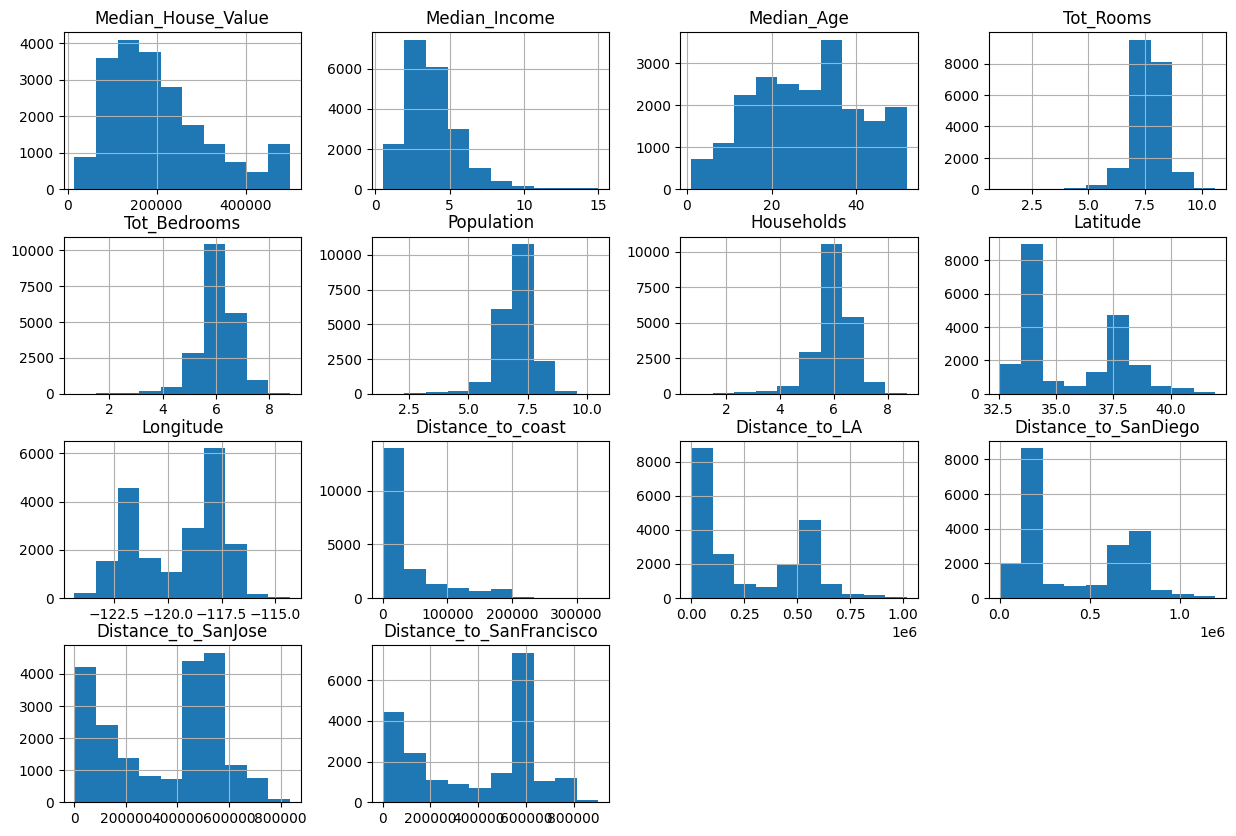

In [4]:
#Preprocessing 
houses['Tot_Rooms']=np.log(houses['Tot_Rooms']+1)
houses['Tot_Bedrooms']=np.log(houses['Tot_Bedrooms']+1)
houses['Population']=np.log(houses['Population']+1)
houses['Households']=np.log(houses['Households']+1)
houses.hist(figsize=(15,10))


Features and targets

In [5]:
#Assigning the features and target values
t = houses.Median_House_Value #target values
x = houses.drop(['Median_House_Value'],axis=1) #features

In [6]:
#Splitting data into 3 sets(train/validation/test)

#Splitting the data set first into 2 sets one of them is the test set with 15% of data
x_train ,x_test ,t_train ,t_test = train_test_split(x,t,test_size=0.15,random_state=None)

#The rest of the 85% of data is splitted into 2 sets one is the train set and the other is the validation set
x_train ,x_valid ,t_train ,t_valid= train_test_split(x_train,t_train,test_size=(15/85),random_state=None)

#x.shape , x_train.shape ,x_valid.shape ,x_test.shape


In [7]:
#Training set as a whole table
train_data = x_train.join(t_train)
train_data

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Median_House_Value
924,5.1643,10,8.914895,7.370860,8.180881,7.290975,37.49,-121.92,13343.626742,505998.270600,684794.974407,17346.190355,54993.716070,193100.0
1814,3.6417,43,7.843849,6.238325,6.966967,6.270988,37.91,-122.31,2541.133847,563678.836562,742588.558538,73686.523848,18499.548480,178400.0
14173,3.8233,36,7.613325,6.013715,6.938284,5.968708,32.75,-117.05,13877.881475,182331.892328,11067.254158,673852.249198,741857.190528,139800.0
399,5.1696,52,7.727535,5.942799,6.912743,5.918894,37.89,-122.29,3881.676339,560850.949133,739757.786118,70884.221473,17900.875350,261400.0
17745,6.1463,6,8.168203,6.327937,7.229114,6.198479,37.30,-121.76,33844.825618,480852.849846,659559.197341,12407.813906,79253.175461,335500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,5.7143,40,6.921658,5.017280,6.109248,5.117994,34.18,-118.42,19747.900810,21570.690508,200376.287500,470371.101783,538391.854905,382400.0
3082,2.2500,15,7.582229,6.001415,6.594413,5.774552,35.68,-118.06,189304.989357,181773.222995,339815.481672,388857.201555,453777.950075,67500.0
15874,2.0577,52,7.075809,5.730100,6.937314,5.726848,37.75,-122.40,1310.679304,555936.687394,734407.314892,64205.848908,3830.715011,214600.0
9315,7.4940,22,8.892199,6.910751,7.811568,6.864848,37.99,-122.47,4602.832877,579673.046536,758482.822536,88747.469284,24260.184086,439200.0


array([[<Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>,
        <Axes: title={'center': 'Tot_Bedrooms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>,
        <Axes: title={'center': 'Distance_to_SanJose'}>],
       [<Axes: title={'center': 'Distance_to_SanFrancisco'}>,
        <Axes: title={'center': 'Median_House_Value'}>, <Axes: >,
        <Axes: >]], dtype=object)

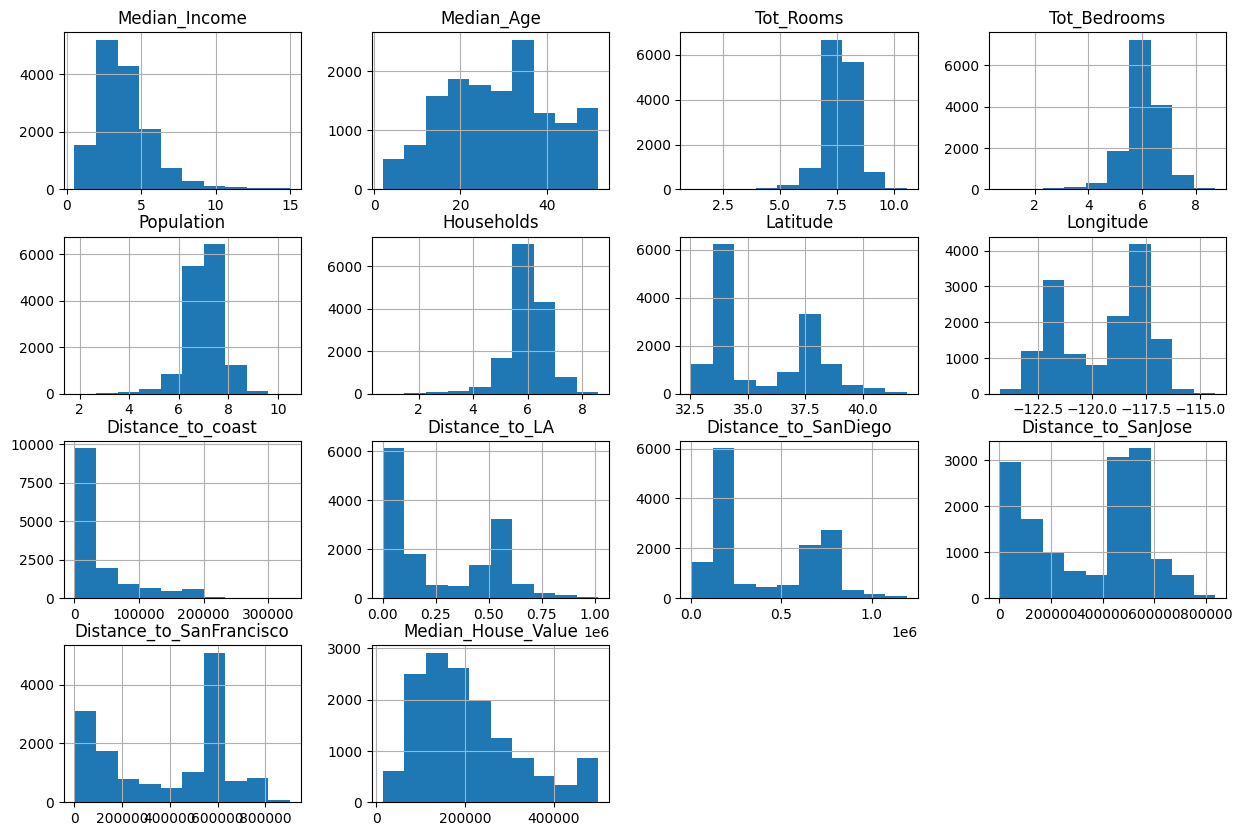

In [8]:
#Historgam of the whole training set
train_data.hist(figsize=(15,10))

<Axes: >

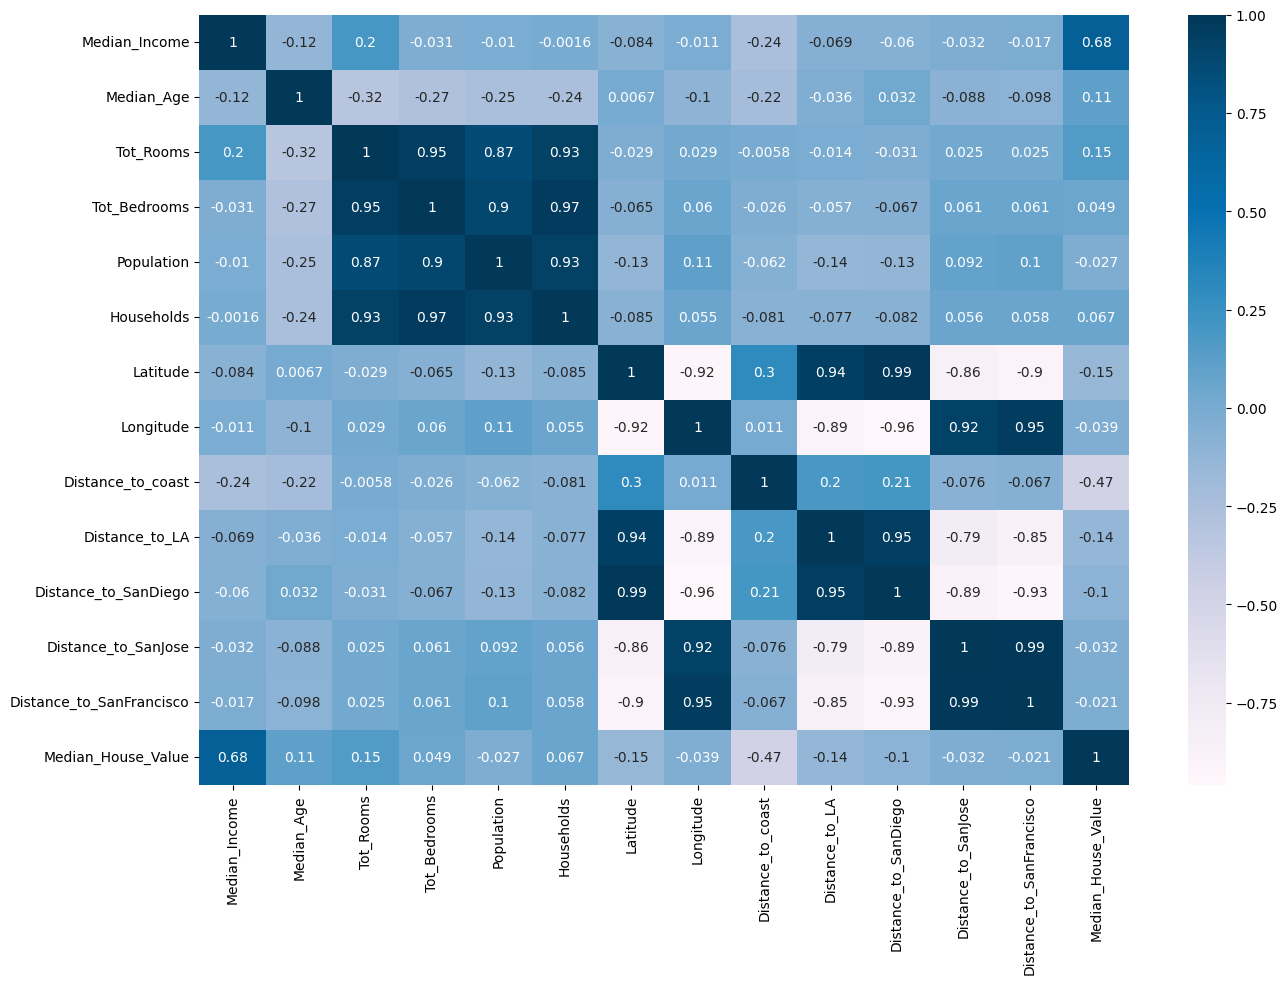

In [9]:
#Heat map of training set
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap="PuBu")

<Axes: xlabel='Latitude', ylabel='Longitude'>

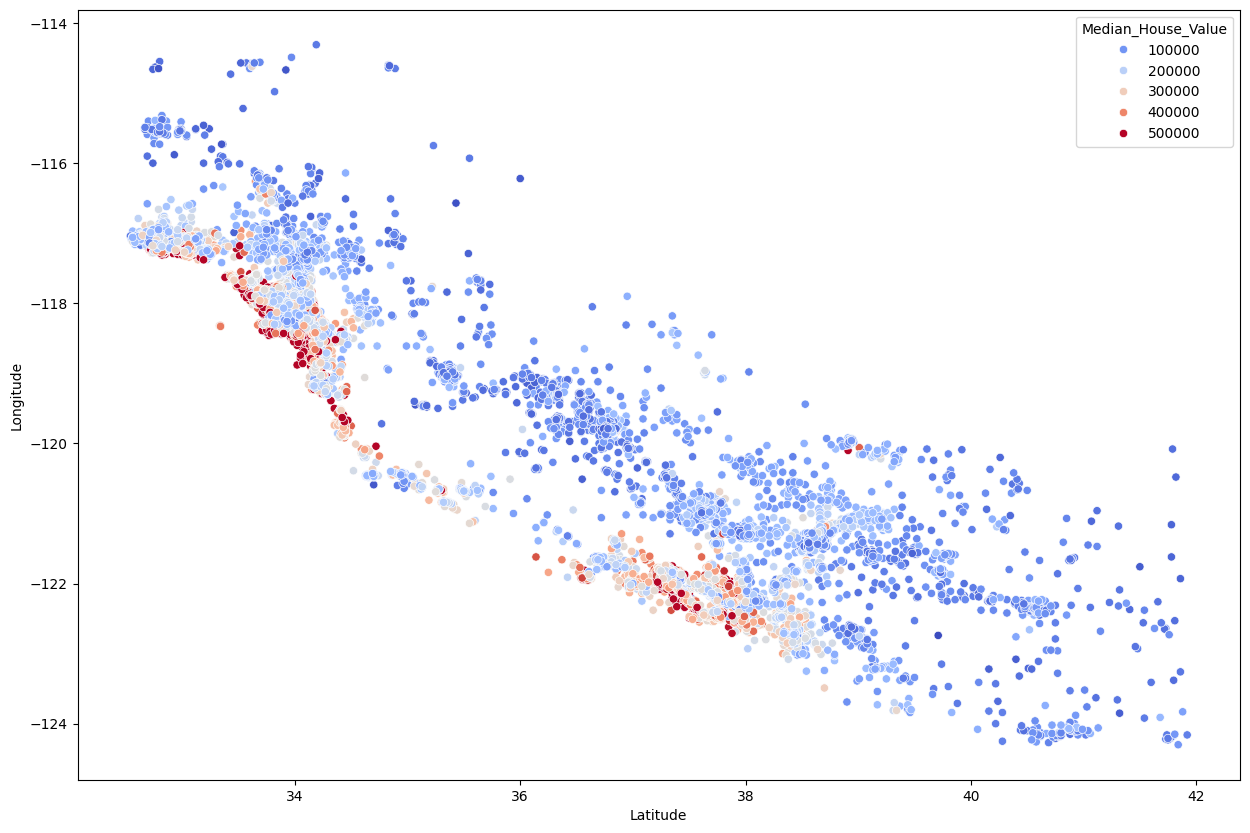

In [10]:
#Showing how the position of features block affect the price target
plt.figure(figsize=(15,10))
sns.scatterplot(x="Latitude",y="Longitude",data=train_data,hue="Median_House_Value",palette="coolwarm")

In [11]:
#Scaling features for all sets(Gets better results)
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_valid_scaled = sc.fit_transform(x_valid)
x_test_scaled = sc.fit_transform(x_test)

TSP =[]   #for storing all test set performances
MSE =[]   #for storing all MSE
MAE =[]   #for storing all MAE

1-Linear Regression Model

In [12]:
#1)Linear regression model

#Building model and fitting
Linmodel =LinearRegression()

Linmodel.fit(x_train_scaled,t_train)


LinearRegression()

In [13]:
#Evaluate Linear reg model using CV

param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search_linear = GridSearchCV(Linmodel, param_grid, cv=5)
grid_search_linear.fit(x_train_scaled, t_train)
best_linear =grid_search_linear.best_estimator_

y_valid_linear= best_linear.predict(x_valid_scaled)

linear_Vscore = metrics.r2_score(t_valid,y_valid_linear)
print("Validation set accuracy: " ,linear_Vscore)


Validation set accuracy:  0.6860027003156908


In [14]:
#Testing data
y_test_linear = best_linear.predict(x_test_scaled)

#Analyzing test set
linear_Tscore =metrics.r2_score(t_test,y_test_linear)
TSP.append(linear_Tscore)
print("Test set accuracy: " ,linear_Tscore)


Test set accuracy:  0.6732352242795774


In [15]:
#Mean Square Error
MSE_VLin = '{0:.2f}'.format(mean_squared_error(t_valid, y_valid_linear))
MAE_VLin = '{0:.2f}'.format(mean_absolute_error(t_valid, y_valid_linear))

print("Mean squared error(Valid set) :", MSE_VLin)
print("Mean Absolute error(Valid set) :",MAE_VLin)


MSE_TLin = '{0:.2f}'.format(mean_squared_error(t_test, y_test_linear))
MAE_TLin = '{0:.2f}'.format(mean_absolute_error(t_test, y_test_linear))

print("Mean squared error(Test set) :",MSE_TLin)
print("Mean Absolute error(Test set) : ",MAE_TLin)

MSE.append(MSE_TLin)
MAE.append(MAE_TLin)


Mean squared error(Valid set) : 4188208320.05
Mean Absolute error(Valid set) : 47463.71
Mean squared error(Test set) : 4422790714.28
Mean Absolute error(Test set) :  48454.29


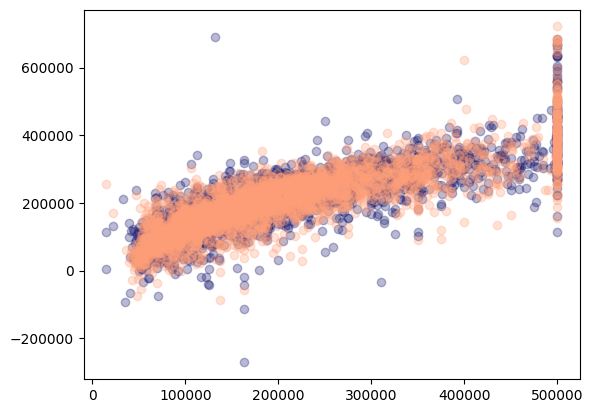

In [16]:
#Showing how the validation set helped the test set

plt.scatter(t_test,y_test_linear,alpha=0.3,c="midnightblue")
plt.scatter(t_valid,y_valid_linear,alpha=0.3,c="lightsalmon")

(0.0, 737534.0915795312)

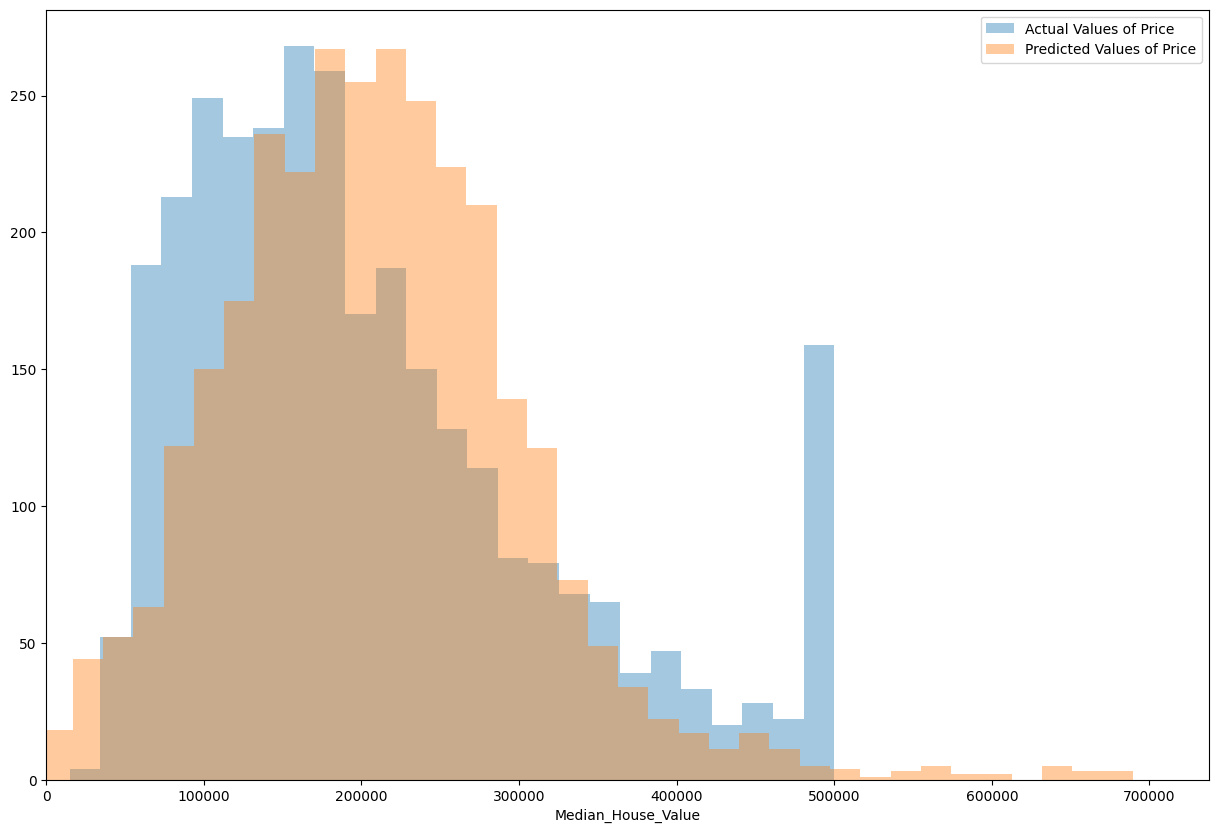

In [17]:
#Showing how well the model predicted the targets
plt.figure(figsize=(15,10))
sns.distplot(t_test, hist=True, kde=False)
sns.distplot(y_test_linear, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

2-Lasso Regression Model

In [18]:
#2)Lasso regression model
#Building model and fitting

lasso= Lasso(random_state= None)

lasso.fit(x_train_scaled,t_train)


Lasso()

In [31]:
#Evaluate Lasso reg model using CV

#range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range1= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]

params_grid= {'alpha': range1}

grid_search_lasso= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

grid_search_lasso.fit(x_train_scaled, t_train)   
best_lasso =grid_search_lasso.best_estimator_
print(best_lasso)
y_valid_lasso= best_lasso.predict(x_valid_scaled)
lasso_Vscore =metrics.r2_score(t_valid,y_valid_lasso)
print("Validation set accuracy: " ,lasso_Vscore)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Lasso(alpha=5e-05)
Validation set accuracy:  0.6859900874721722


In [20]:
#Testing data
y_test_lasso = best_lasso.predict(x_test_scaled)

#Analyzing test set
lasso_Tscore = metrics.r2_score(t_test,y_test_lasso)
TSP.append(lasso_Tscore)
print("Test set accuracy: " ,lasso_Tscore)

Test set accuracy:  0.6732259632016819


In [21]:
#Mean Square Error
MSE_VLas = '{0:.2f}'.format(mean_squared_error(t_valid, y_valid_lasso))
MAE_VLas = '{0:.2f}'.format(mean_absolute_error(t_valid, y_valid_lasso))

print("Mean squared error(Valid set) :", MSE_VLas)
print("Mean Absolute error(Valid set) :",MAE_VLas)


MSE_TLas = '{0:.2f}'.format(mean_squared_error(t_test, y_test_lasso))
MAE_TLas = '{0:.2f}'.format(mean_absolute_error(t_test, y_test_lasso))

print("Mean squared error(Test set) :",MSE_TLas)
print("Mean Absolute error(Test set) : ",MAE_TLas)

MSE.append(MSE_TLas)
MAE.append(MAE_TLas)


Mean squared error(Valid set) : 4188376554.67
Mean Absolute error(Valid set) : 47465.07
Mean squared error(Test set) : 4422916063.81
Mean Absolute error(Test set) :  48454.76


(0.0, 737622.6143260516)

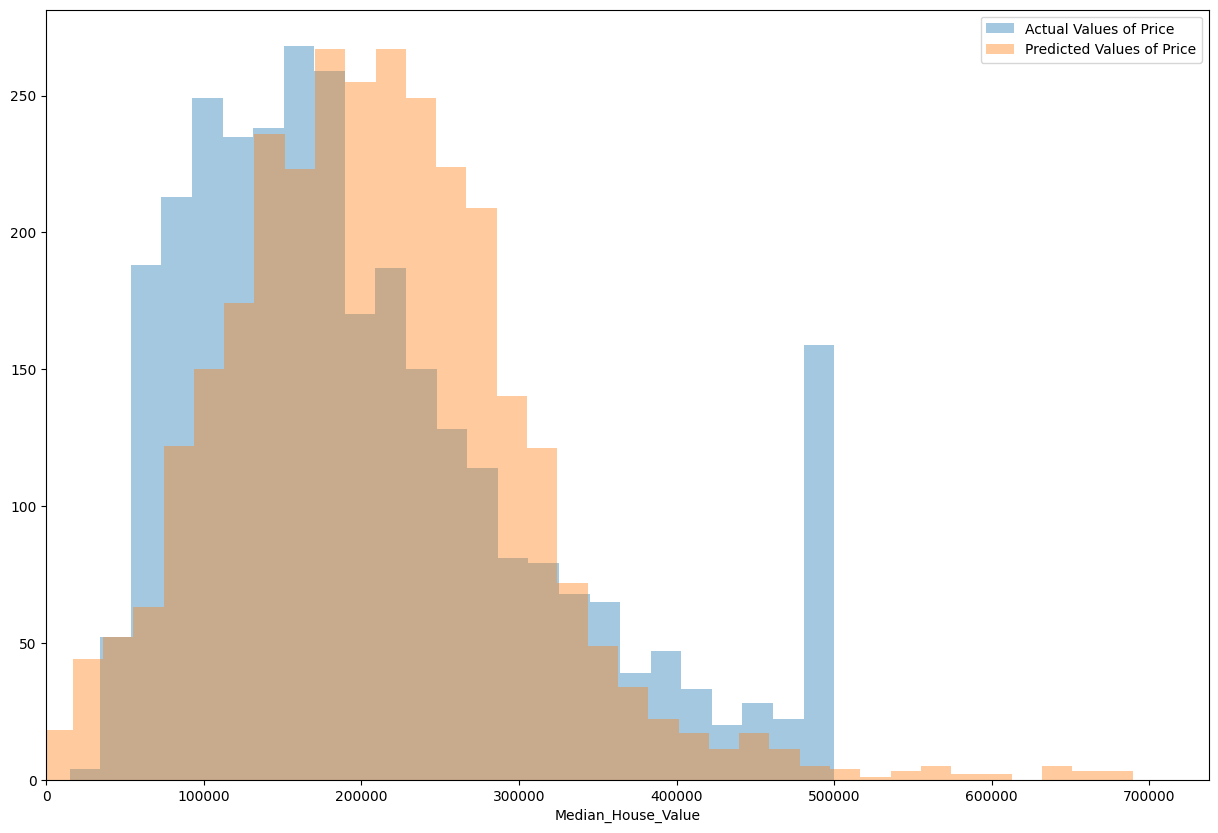

In [22]:
#Showing how well the model predicted the targets
plt.figure(figsize=(15,10))
sns.distplot(t_test, hist=True, kde=False)
sns.distplot(y_test_lasso, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

3-Ridge Regression Model

In [23]:
#3)Ridge Regression model

#Building model and fitting
ridge= Ridge(random_state= None)

ridge.fit(x_train_scaled,t_train)


Ridge()

In [24]:
#Evaluate Ridge reg model using CV

#range2= list(range(2, 1001))

#params_grid= {'alpha': range2}
params_grid = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

grid_search_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

grid_search_ridge.fit(x_train_scaled, t_train)   
best_ridge =grid_search_ridge.best_estimator_
print(best_ridge)
y_valid_ridge= best_ridge.predict(x_valid_scaled)
ridge_Vscore =metrics.r2_score(t_valid,y_valid_ridge)
print("Validation set accuracy: " ,ridge_Vscore)


Fitting 3 folds for each of 23 candidates, totalling 69 fits
Ridge(alpha=0.0001)
Validation set accuracy:  0.6860026979261413


In [25]:
#Testing data
y_test_ridge = best_ridge.predict(x_test_scaled)

#Analyzing test set
ridge_Tscore = metrics.r2_score(t_test,y_test_ridge)
TSP.append(ridge_Tscore)
print("Test set accuracy: " ,ridge_Tscore)


Test set accuracy:  0.6732352231944669


In [26]:
#Mean Square Error
MSE_VRid = '{0:.2f}'.format(mean_squared_error(t_valid, y_valid_ridge))
MAE_VRid = '{0:.2f}'.format(mean_absolute_error(t_valid, y_valid_ridge))

print("Mean squared error(Valid set) :", MSE_VRid)
print("Mean Absolute error(Valid set) :",MAE_VRid)


MSE_TRid = '{0:.2f}'.format(mean_squared_error(t_test, y_test_ridge))
MAE_TRid = '{0:.2f}'.format(mean_absolute_error(t_test, y_test_ridge))

print("Mean squared error(Test set) :",MSE_TRid)
print("Mean Absolute error(Test set) : ",MAE_TRid)

MSE.append(MSE_TRid)
MAE.append(MAE_TRid)


Mean squared error(Valid set) : 4188208351.92
Mean Absolute error(Valid set) : 47463.71
Mean squared error(Test set) : 4422790728.97
Mean Absolute error(Test set) :  48454.29


(0.0, 737534.0866889491)

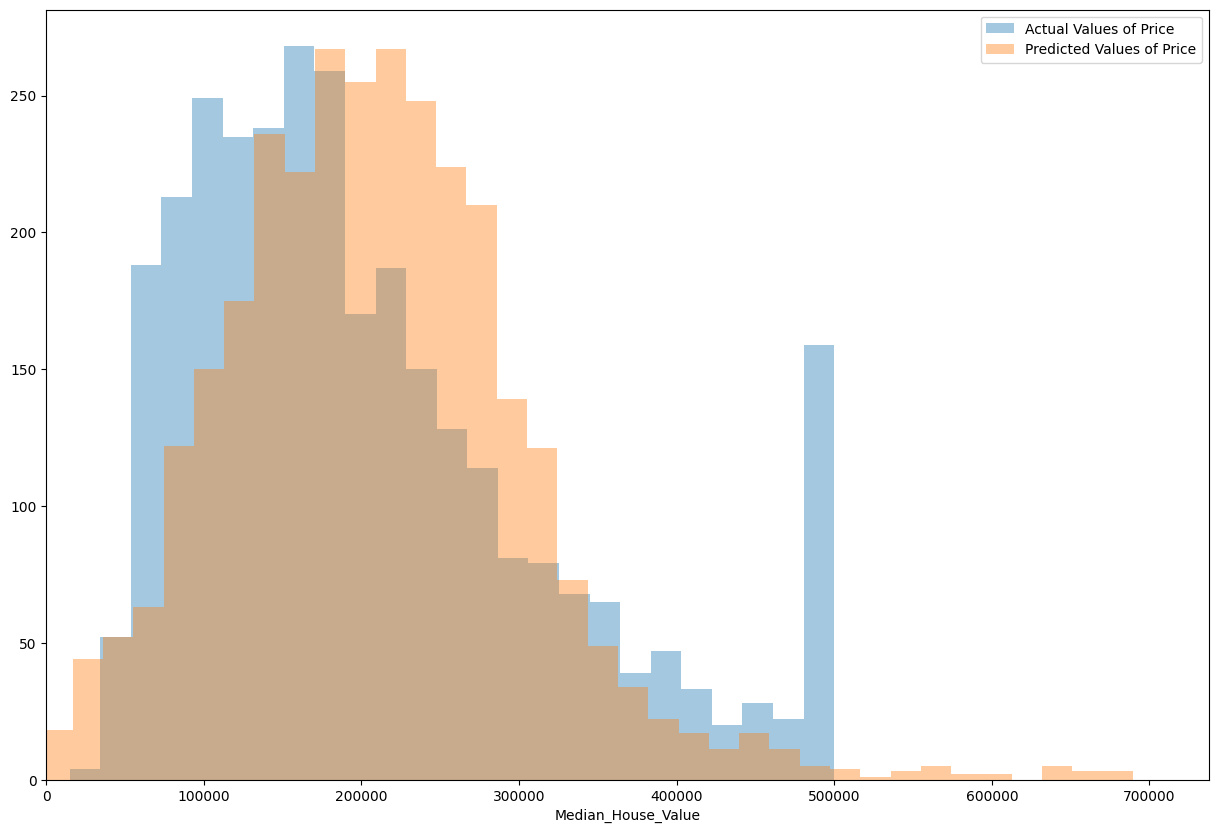

In [27]:
#Showing how well the model predicted the targets
plt.figure(figsize=(15,10))
sns.distplot(t_test, hist=True, kde=False)
sns.distplot(y_test_ridge, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

In [32]:
TSP

[0.6732352242795774, 0.6732259632016819, 0.6732352231944669]

Summary of models

In [28]:
#Comaparing performances 
regressor = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
test_set = pd.DataFrame({'Regression Model':regressor,'Test set performance':TSP,'Mean Square error':MSE,'Mean Absolute error':MAE})
test_set

,Regression Model,Test set performance,Mean Square error,Mean Absolute error
0,Linear Regression,0.673235,4422790714.28,48454.29
1,Lasso Regression,0.673226,4422916063.81,48454.76
2,Ridge Regression,0.673235,4422790728.97,48454.29


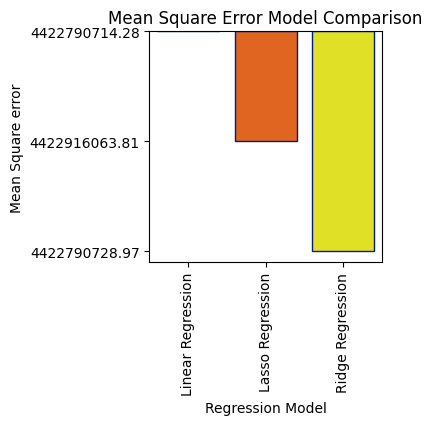

In [29]:
# Creating plot to show the train accuracy

plt.subplots(figsize=(3,3))
sns.barplot(x="Regression Model",y= "Mean Square error",data=test_set,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Mean Square Error Model Comparison')
plt.show()